# 시스템 모델
- 우리가 다루는 문제를 수학식으로 표현해 놓은 것
- 시스템 모델을 모델링 및 유도하는 것은 어려운 일
- 예제에서 시스템모델은 알고있다고 가정
- 이 장에서는 칼만필터의 시스템모델이 어떤 형태를 가져야하는지, 시스템 모델이 칼만필터 알고리즘에 어떻게 이용되는지 설명
- 선형시스템(linear system)의 상태모델(state model)에 대한 '어느 정도'의 사전지식이 있어야 함

## 시스템 모델
- 칼만필터는 다음과 같은 선형 상태 모델을 대상으로 함
    1. xk+1 = Axk + wk
    2. zk = Hxk + vk
    - 위 식에서 시스템 모델에 잡음이 포함되어 있어야 한다는 점 중요
    
### 변수 정의
- xk : 상태변수, (n * 1) 열 벡터 (거리, 속도, 무게 등 우리가 관심있는 물리적 변수)
- zk : 측정값, (m * 1) 열 벡터
- A : 시스템행렬, (n * n) 행렬 (시간예 따라 시스템이 어떻게 움직이는지 나타냄)
- H : 출력행렬, (m * n) 행렬 (측정값에 각 상태변수가 어떻게 반영되어 있는지 규정)
- wk : 시스템잡음, (n * 1) 열벡터 (시스템에 유입되어 상태변수에 영향을 주는 잡음)
- vk : 측정잡음, (m * 1) 열벡터 (센서에서 유입되는 측정잡음)
    
    
- 칼만필터에서 잡음은 중요한 역할, 모든 잡음을 백색잡음으로 가정 (https://ko.wikipedia.org/wiki/%EB%B0%B1%EC%83%89_%EC%86%8C%EC%9D%8C)
- A와H는 모든 성분이 상수인 행렬

### 상태공간 모델
- 식7.1과 식7.2와 같이 시스템의 운동방정식을 상태변수 벡터에 대해 1차 차분(or미분)방정식으로 표현한 모델

### 칼만필터 알고리즘에서 시스템 모델과 관련 있는 부분
- 1단계 추정값 예측식
- 3단계 추정값 계산식
- 위 두식을 시스템 모델과 비교하면 잡음이 빠져 있다는 점만 다르고, 시스템 모델과 연관되어있다는 점 알 수 있음


## 잡음의 공분산
- 잡음 신호는 다음에 어떤 값이 나올지 예측할 수 없고, 순전히 통계적인 추정만 가능 (= 잡음을 표현할때는 통계학 이용)
- 칼만 필터에서 잡음은 평균이 0인 정규분포 따른다고 가정하므로, 잡음의 분산만 알면 됨
- 칼만필터에서 상태모델의 잡음 표현 (공분산 행렬, 대각행렬)
- 대각행렬 (https://ko.wikipedia.org/wiki/%EB%8C%80%EA%B0%81_%ED%96%89%EB%A0%AC)
    - Q : wk의 공분산 행렬, (n * n) 대각행렬
    - R : vk의 공분산 행렬, (m * m) 대각행렬
    
    
- 공분산 행렬은 변수의 분산으로 구성된 행렬로 정의

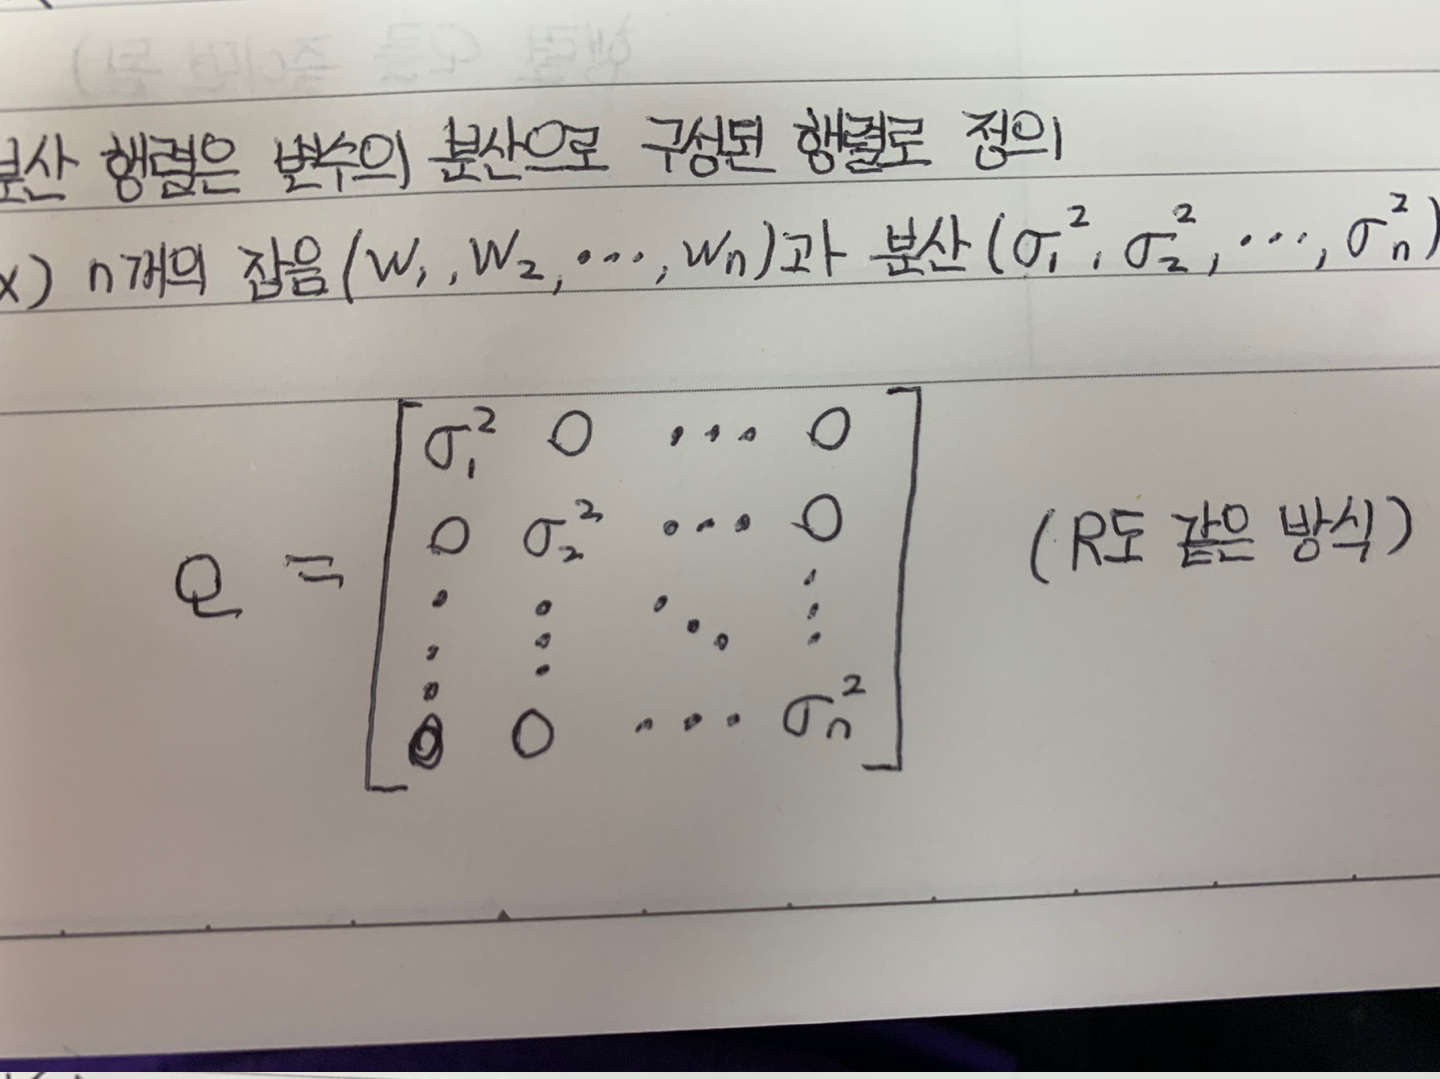

In [1]:
from PIL import Image
Image.open('./data/img/ch07_1.jpeg')

- Q와 R은 잡음 특성 정확히 반영해서 구성하는게 원칙이지만, 여러 오차의 복합적 작용으로 해석적 결정에는 한계 있음
- 잡음에 대한 지식을 최대한 활용하되, 두 행렬을 칼만필터의 설계인자로 보고 시행착오 과정을 통해 보정하며 적절한 값 찾아야 함

### 적절한 값을 찾는 기준
- 행렬 Q와 R이 사용되는 지점

1. 칼만 이득 계산식 (행렬 R 사용)
     - R이 커지면 칼만이득이 작아짐
     - 칼만이득이 작아지면 측정값보다 예측값의 반영비율이 높아짐
     - 측정값의 영향을 덜 받고 변화가 완만한 추정값을 얻고 싶다면, 행렬 R을 키우면 됨
     
2. 오차 공분산의 예측값 계산식 (행렬 Q 사용)
    - Q가 커지면 오차공분산 예측값도 커짐
    - 오차공분산 예측값이 커지면 칼만이득도 커짐
    - 측정값의 영향을 덜 받고 변화가 완만한 추정값을 얻고 싶다면, 행렬 Q를 줄이면 됨 (R과 반대)